<a href="https://colab.research.google.com/github/AlpaslanErdag/Autonomous-Car-2022MLIS2/blob/main/MLiSII_AutonomousCar_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AlpaslanErdag/cardata  # CLONING DATA FROM GITHUB

Cloning into 'cardata'...
remote: Enumerating objects: 14848, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 14848 (delta 8), reused 19 (delta 4), pack-reused 14822
Receiving objects: 100% (14848/14848), 1.64 GiB | 30.59 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (14829/14829), done.


In [21]:
# PART 1 ---> LOADING DATA AND VISUALISATION
# PART 2 ---> TRAINING MODEL FOR "ANGLE" VALUE
# PART 3 ---> TRAINING MODEL FOR "SPEED" VALUE
# PART 4 ---> OPTIONAL PART. IN THIS PART I'VE USED VALIDATION DATA TO TEST ()
# PART 5 ---> PREDICTING VALUES FROM TEST DATA

In [2]:
!ls cardata

1.png  4.png  sampleSubmission.csv  training_data	training_norm.csv
2.png  5.png  Test.csv		    training_norm2.csv
3.png  6.png  test_data		    training_norm3.csv


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam # - Works
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense,Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import glob
import random

In [4]:
######### PART-1 #########
##########################
datadir= 'cardata'
colums= ['image_id','angle','speed']
data=pd.read_csv(os.path.join(datadir,'training_norm3.csv'))
data.head()

,image_id,angle,speed
0,1.png,0.4375,0
1,2.png,0.8125,1
2,3.png,0.4375,1
3,4.png,0.6250,1
4,5.png,0.5000,0


[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]


<BarContainer object of 15 artists>

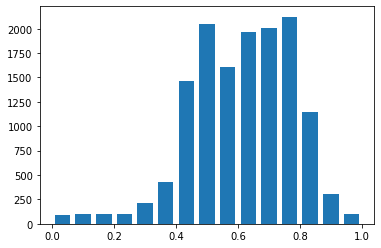

In [11]:
num_bins= 15
hist, bins=np.histogram(data['angle'],num_bins)
center= (bins[:-1]+ bins[1:])*0.5
print(bins)
plt.bar(center,hist,width=0.05)

In [111]:
########## PART 2###########
############################
print(data.iloc[3])
def load_img_steering(datadir, df):
  image_path = []
  angle = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path.append(os.path.join(datadir,image_id))
    angle.append(float(indexed_data[1]))
    #speed.append((indexed_data[2]))
  image_paths = np.asarray(image_path)
  angles = np.asarray(angle)
  #speeds= np.asarray(speed)
  image_ids= np.asarray(image_id)
  return image_paths, angles


image_id    4.png
angle       0.625
speed           1
Name: 3, dtype: object


In [112]:
image_paths,angles= load_img_steering(datadir + '/training_data/training_data', data)
type(angles)

numpy.ndarray

In [113]:
X_train,X_valid,y_train,y_valid= train_test_split(image_paths,angles,test_size=0.2,random_state=3)
y_train

array([0.625 , 0.6875, 0.6875, ..., 0.875 , 0.6875, 0.5   ])

Text(0.5, 1.0, 'Validation set')

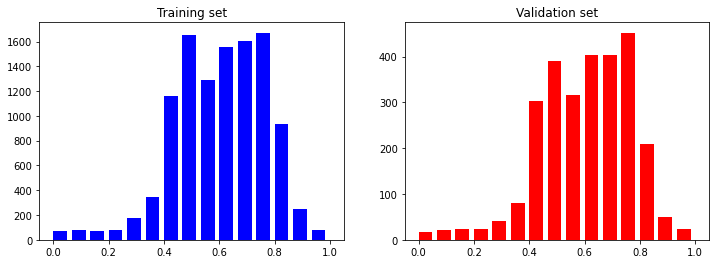

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [11]:
########THIS IS IMAGE PROCESS PART, TO GET BETTER RESULTS WE SHOULD IMPROVE THIS####################
########################################################################################################
def img_preprocess(img):
    img=mpimg.imread(img)
    img= np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    return img

In [ ]:
### BEFORE FINDING "MAP" FUNCTION I WAS GOING TO APPLY IMG_PROCESS FUNCTION ITERATIVELY OVER THE IMAGES...
## BUT THIS IS UNNECESSARY PART
## FOR "MAP" FUNCTION CHECK THIS WEBSITE: https://www.geeksforgeeks.org/python-map-function/
import glob
    
    # loop the image folder
image_files = glob.glob(datadir+"*.csv")
for idx, file in enumerate(image_files):
		print(file)
		

In [16]:
image_paths[0]

'cardata/training_data/training_data/1.png'

In [17]:
image1 = image_paths[10]
original_image = mpimg.imread(image_paths[10])
preprocessed_image = img_preprocess(image1)

Text(0.5, 1.0, 'Preprocessed Image')

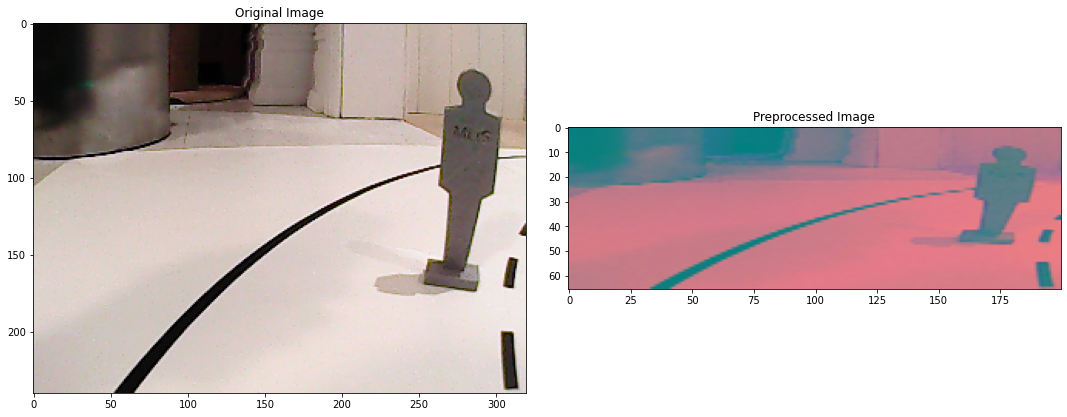

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [20]:
# this line is to aplly img_preprocess function to all X_train images
X_train_TR=np.array(list(map(img_preprocess, X_train)))

(11034, 66, 200, 3)


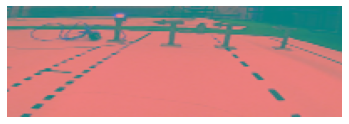

In [31]:
# to see map function works correctly
plt.imshow(X_train_TR[random.randint(0,len(X_train_TR)-1)])
plt.axis('off')
print(X_train_TR.shape)

In [24]:
X_valid_TR=np.array(list(map(img_preprocess, X_valid)))


In [18]:
def nvidia_model():
 
  model = Sequential()
 
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='relu'))
 
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Dropout(0.5))
 
 
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
 
 
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation ='relu'))
  model.add(Dense(1))
 
 
  optimizer= Adam(learning_rate=1e-3)
  model.compile(loss='mse', optimizer=optimizer)

  return model

In [32]:
model = nvidia_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout_2 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [35]:
X_train_TR.shape

(11034, 66, 200, 3)

In [36]:
history= model.fit(X_train_TR,y_train, epochs=10, validation_data=(X_valid_TR,y_valid),batch_size=100, verbose=1, shuffle=1)


Epoch 1/10
111/111 [==============================] - 76s 678ms/step - loss: 0.0421 - val_loss: 0.0292
Epoch 2/10
111/111 [==============================] - 76s 679ms/step - loss: 0.0220 - val_loss: 0.0161
Epoch 3/10
111/111 [==============================] - 85s 766ms/step - loss: 0.0149 - val_loss: 0.0116
Epoch 4/10
111/111 [==============================] - 85s 764ms/step - loss: 0.0124 - val_loss: 0.0106
Epoch 5/10
111/111 [==============================] - 82s 738ms/step - loss: 0.0111 - val_loss: 0.0094
Epoch 6/10
111/111 [==============================] - 96s 867ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 7/10
111/111 [==============================] - 96s 866ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 8/10
111/111 [==============================] - 108s 978ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 9/10
111/111 [==============================] - 102s 919ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 10/10
111/111 [==============================] - 107s 962ms/step 

Text(0.5, 0, 'Epoch')

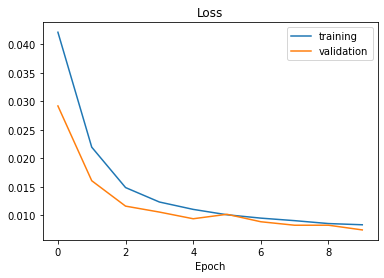

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [38]:
########## SAVING MODEL AND DOWNLOAD TO LOCAL #####
model.save('modelforAngle.h5')
from google.colab import files
files.download('modelforAngle.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Mount my Google Drive.  It will ask for an authenticate code
### BEFORE THIS DONT FORGET TO UPLOAD MODEL FILE TO DRIVE
from google.colab import drive
drive.mount('/content/gdrive')
model_output_dir = '/content/gdrive/My Drive/Colab Notebooks'

Mounted at /content/gdrive


In [ ]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
model_test = load_model(f'{model_output_dir}/model.h5')

# ANGLE PREDICTIONS WILL BE DONE AT THE BOTTOM LINE

In [107]:
########## OPTIONAL PART ############
#####################################
#####################################

from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# this function and below function is to see the performance of our model, you can check the images below
def summarize_prediction(Y_true, Y_pred):
    
    mse = mean_squared_error(Y_true, Y_pred)
    r_squared = r2_score(Y_true, Y_pred)
    
    print(f'mse       = {mse:.2}')
    print(f'r_squared = {r_squared:.2%}')
    print()

In [115]:
def predict_and_summarize(X, Y):
    model = load_model(f'{model_output_dir}/modelforSpeed.h5')
    Y_pred = model.predict(X)
    summarize_prediction(Y, Y_pred)
    return Y_pred

In [117]:
X_valid1

array(['cardata/training_data/training_data/6109.png',
       'cardata/training_data/training_data/7534.png',
       'cardata/training_data/training_data/9118.png', ...,
       'cardata/training_data/training_data/8959.png',
       'cardata/training_data/training_data/5911.png',
       'cardata/training_data/training_data/11111.png'], dtype='<U45')

In [122]:
#I've used X_valid and y_valid to work this function and produce y_pred. Then below we can see predicted and actual angles.
# when we need to submit results to kaggle we need to use TEST_DATA....
y_pred = predict_and_summarize(X_valid_TST, y_valid1)
y_pred=np.around(y_pred)


mse       = 0.034
r_squared = 81.41%



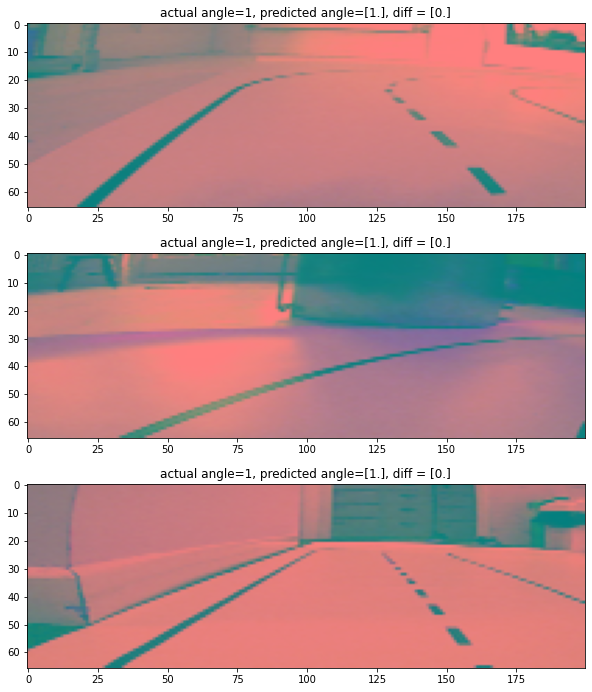

In [130]:
n_tests_show = 3
fig, axes = plt.subplots(n_tests_show, 1, figsize=(10, 4 * n_tests_show))
for i in range(n_tests_show):
    axes[i].imshow(X_valid_TST[i])
    axes[i].set_title(f"actual angle={y_valid1[i]}, predicted angle={(y_pred[i])}, diff = {(y_valid1[i])-y_pred[i]}")

# results look acceptable for now... I'll improve images process function and i hope results will be much better

In [5]:
### MODEL FOR SPEED PREDICTION ####
###################################
###################################

print(data.iloc[13])
def load_speed_img(datadir, df):
  image_path1 = []
  speed1 = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path1.append(os.path.join(datadir,image_id))
    #angle.append(float(indexed_data[1]))
    speed1.append((indexed_data[2]))
  image_paths1 = np.asarray(image_path1)
  #angles = np.asarray(angle)
  speeds1= np.asarray(speed1)
  return image_paths1,speeds1

image_id    14.png
angle        0.875
speed            1
Name: 13, dtype: object


In [6]:
image_paths1,speeds1= load_speed_img(datadir + '/training_data/training_data', data)


In [9]:
X_train1,X_valid1,y_train1,y_valid1= train_test_split(image_paths1,speeds1,test_size=0.2,random_state=3)
speeds1

array([0, 1, 1, ..., 0, 0, 1])

In [8]:
y_train1

array([1, 0, 1, ..., 1, 1, 0])

In [12]:
image10 = image_paths1[10]
original_image = mpimg.imread(image_paths1[10])
preprocessed_image = img_preprocess(image10)
X_train1

array(['cardata/training_data/training_data/9137.png',
       'cardata/training_data/training_data/2796.png',
       'cardata/training_data/training_data/11415.png', ...,
       'cardata/training_data/training_data/11519.png',
       'cardata/training_data/training_data/1689.png',
       'cardata/training_data/training_data/5998.png'], dtype='<U45')

In [13]:
# this line is to aplly img_preprocess function to all X_train images
X_train_TST=np.array(list(map(img_preprocess, X_train1)))

In [14]:
X_valid_TST=np.array(list(map(img_preprocess, X_valid1)))

(2759, 66, 200, 3)


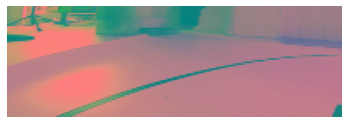

In [15]:
# to see map function works correctly
plt.imshow(X_valid_TST[random.randint(0,len(X_valid_TST)-1)])
plt.axis('off')
print(X_valid_TST.shape)

In [16]:
X_valid_TST.shape

(2759, 66, 200, 3)

In [19]:
model_Speed = nvidia_model()
print(model_Speed.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [71]:
y_valid1

array([1, 1, 1, ..., 1, 1, 0])

In [20]:
history1= model_Speed.fit(X_train_TST,y_train1, epochs=10, validation_data=(X_valid_TST,y_valid1),batch_size=100, verbose=1, shuffle=1)

Epoch 1/10
111/111 [==============================] - 51s 452ms/step - loss: 0.2704 - val_loss: 0.2199
Epoch 2/10
111/111 [==============================] - 49s 442ms/step - loss: 0.1514 - val_loss: 0.1197
Epoch 3/10
111/111 [==============================] - 50s 454ms/step - loss: 0.0790 - val_loss: 0.0628
Epoch 4/10
111/111 [==============================] - 49s 444ms/step - loss: 0.0558 - val_loss: 0.0474
Epoch 5/10
111/111 [==============================] - 49s 441ms/step - loss: 0.0497 - val_loss: 0.0462
Epoch 6/10
111/111 [==============================] - 51s 459ms/step - loss: 0.0435 - val_loss: 0.0432
Epoch 7/10
111/111 [==============================] - 50s 446ms/step - loss: 0.0423 - val_loss: 0.0366
Epoch 8/10
111/111 [==============================] - 49s 444ms/step - loss: 0.0364 - val_loss: 0.0349
Epoch 9/10
111/111 [==============================] - 62s 564ms/step - loss: 0.0340 - val_loss: 0.0363
Epoch 10/10
111/111 [==============================] - 60s 541ms/step - l

Text(0.5, 0, 'Epoch')

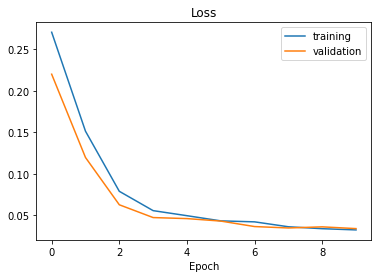

In [24]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [26]:
model_Speed.save('modelforSpeed.h5')
from google.colab import files
files.download('modelforSpeed.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
##############FOR REAL TEST DATA################
###############################################
#################################################
colums= ['image_id1','angle1','speed1']
data1=pd.read_csv(os.path.join(datadir,'Test.csv'))
data1.head()


,image_id,angle,speed
0,1.png,NaN,NaN
1,2.png,NaN,NaN
2,3.png,NaN,NaN
3,4.png,NaN,NaN
4,5.png,NaN,NaN


In [73]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
modelSpeed = load_model(f'{model_output_dir}/modelforSpeed.h5')

In [66]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
modelAngle = load_model(f'{model_output_dir}/modelforAngle.h5')
modelAngle

In [49]:
print(data.iloc[13])
def load_test_img(datadir, df):
  test_path = []
  
  for i in range(len(data1)):
    indexed_data = data1.iloc[i]
    image_id = indexed_data[0]
    test_path.append(os.path.join(datadir,image_id))
    test_paths = np.asarray(test_path)
 
  return test_paths

test_paths= load_test_img(datadir + '/test_data/test_data', data1)

image_id    14.png
angle        0.875
speed            1
Name: 13, dtype: object


In [56]:
type(test_paths)
X_test=np.array(list(map(img_preprocess, test_paths)))

In [67]:
Speed_Pred = modelSpeed.predict(X_test)
Angle_Pred = modelAngle.predict(X_test)

In [68]:
Angle_Pred.shape

(1020, 1)

In [69]:
Angle_Pred

array([[0.54934806],
       [0.74692005],
       [0.28832605],
       ...,
       [0.49592435],
       [0.5329454 ],
       [0.2635128 ]], dtype=float32)

In [90]:
Speed_Pred=np.around(Speed_Pred)

print(Speed_Pred)

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [143]:
test_paths

array(['cardata/test_data/test_data/1.png',
       'cardata/test_data/test_data/2.png',
       'cardata/test_data/test_data/3.png', ...,
       'cardata/test_data/test_data/1018.png',
       'cardata/test_data/test_data/1019.png',
       'cardata/test_data/test_data/1020.png'], dtype='<U36')

In [159]:
!ls

sample.csv  Speed_Pred.csv  SpeedPred.csv  Speedprediction  Speedprediction.csv


In [162]:

pd.DataFrame(Angle_Pred).to_csv('Angle_Pred.csv')